# Symulacja Komputerowa, Lista 1

## Kod

Importowanie bibliotek

In [70]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
from scipy import stats
from scipy.stats import t as tp
from scipy.stats import chi2

Funkcja losująca współrzędne X i Y z rozkładu równomiernego

In [3]:
def cords():
    X = random.uniform(0,20)
    Y = random.uniform(0,20)
    return X,Y

Funkcja licząca występowanie każdej klasy

In [4]:
def classes(data):
    return Counter(data)

Funkcja do obliczania punktów dla każdego strzału


In [5]:
import math

def in_circle(x, y):
    center1 = [10, 0]  
    center2 = [10, 20] 

    dist1 = math.dist([x, y], center1)
    dist2 = math.dist([x, y], center2)
    
    def get_points(dist):
        if dist <= 1:
            return 10
        elif dist <= 2:
            return 9
        elif dist <= 3:
            return 8
        elif dist <= 4:
            return 7
        elif dist <= 5:
            return 6
        elif dist <= 6:
            return 5
        elif dist <= 7:
            return 4
        elif dist <= 8:
            return 3
        elif dist <= 9:
            return 2
        elif dist <= 10:
            return 1
        else:
            return 0
    
    points1 = get_points(dist1)
    points2 = get_points(dist2)
    
    return max(points1, points2)


Funkcja do obliczania statystyki testowej t - studenta

In [6]:
def t_value(n,std,mean,h_value):
    t = (mean - h_value)/(std/math.sqrt(n))
    p = 2 * tp.sf(abs(t), n-1)
    return t,p

Funkcja testu Chi-Kwadrat

In [71]:
def chisquare(data):
    n_classes = 10 
    n = len(data)  
    expected_value = n / n_classes 
    count = Counter(data)
    observed = np.array([count.get(i, 0) for i in range(1, n_classes + 1)])  
    result = np.sum((observed - expected_value) ** 2 / expected_value) 
    df = n-1
    p_value = chi2.sf(result, df)
    return result,p_value


Funkcja do rysowania histogramów

In [65]:
def histogram(a):

    plt.figure(figsize=(12,8))
    plt.hist(a, bins=np.arange(0, 11, 1), density=False, color='skyblue', edgecolor='black')
    plt.title(f'Histogram dla próby o długości {len(a)}')
    plt.xlabel('Wartości')
    plt.ylabel('Gęstość')
    plt.xticks(np.arange(0, 11, 1))
    plt.legend()

    plt.tight_layout()
    plt.show()

## Symulacja

Symulacja n = 10

In [38]:
points_10 = []
for i in range(10):
    X,Y = cords()
    point = in_circle(X,Y)
    points_10.append(point)
    
    

Symulacja n = 100

In [39]:
points_100 = []
for i in range(100):
    X,Y = cords()
    point = in_circle(X,Y)
    points_100.append(point)

Symulacja n = 1000

In [40]:
points_1000 = []
for i in range(1000):
    X,Y = cords()
    point = in_circle(X,Y)
    points_1000.append(point)

### Średnia z prób

In [41]:
mean_10 = np.mean(points_10)
mean_100 = np.mean(points_10)
mean_1000 = np.mean(points_10)

Dla symulacji n = 10

In [42]:
mean_10

np.float64(2.2)

Dla symulacji n = 100

In [43]:
mean_100

np.float64(2.2)

Dla symulacji n = 1000

In [44]:
mean_1000

np.float64(2.2)

### Odchylenie standardowe z prób

In [45]:
std_10 = np.std(points_10)
std_100 = np.std(points_100)
std_1000 = np.std(points_1000)

Dla symulacji n = 10

In [46]:
std_10

np.float64(1.5362291495737217)

Dla symulacji n = 100

In [47]:
std_100

np.float64(2.4994999499899975)

Dla symulacji n = 1000

In [48]:
std_1000

np.float64(2.7161855606714354)

### Wartości krytyczne

## Testy statystyczne i Histogramy

### Hipoteza

Hipoteza zerowa : Średnia wyników symulacji jest większa od 5   
Hipoteza alternatywna : Średnia wyników symulacji jest mniejsza lub równa 5


### Wartości Krytyczne

In [49]:
critical_value_10 = 1.8331
critical_value_100 = 1.660
critical_value_1000 = 1.645

### Dla Symulacji n = 10

Histogram

C:\Users\nukle\AppData\Local\Temp\ipykernel_10312\1487444111.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


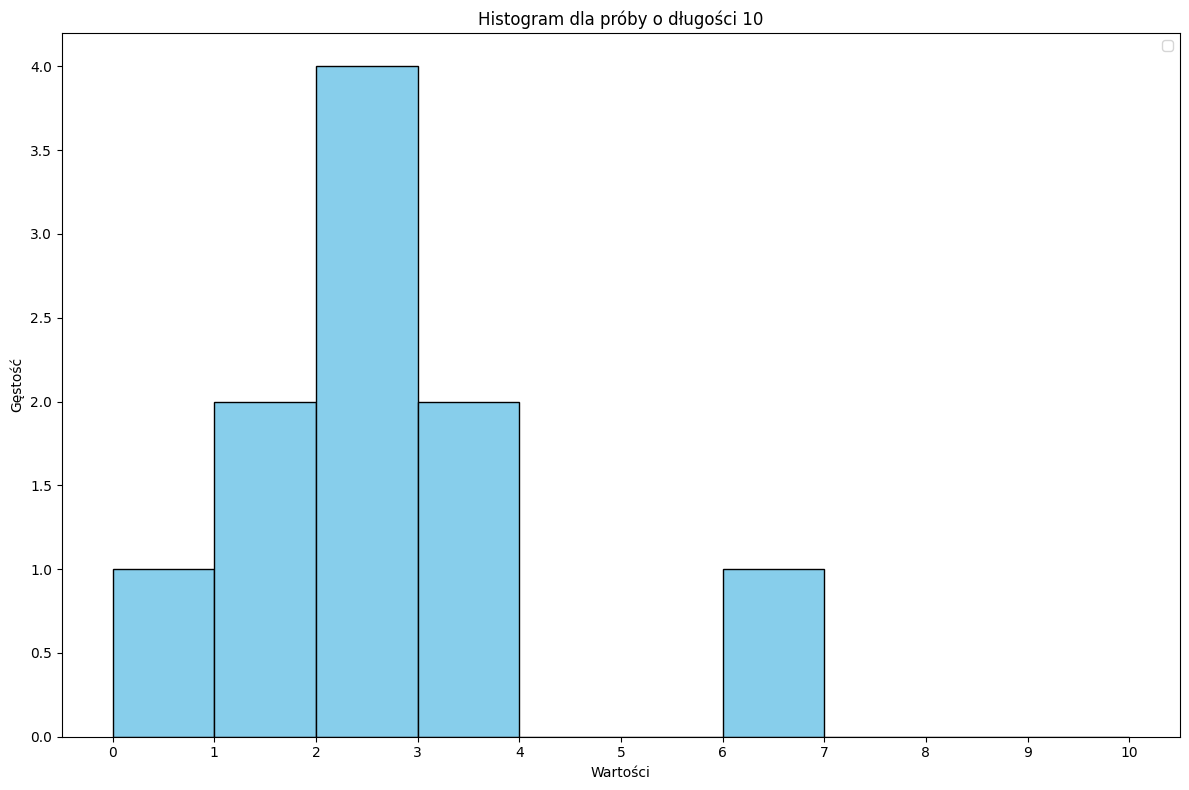

In [66]:
histogram(points_10)

Wynik testu t - studenta

In [ ]:
if abs(t_value(10,std_10,mean_10,5)[0]) > critical_value_10:
    print("Odrzucamy hipotezę zerową i przyjmujemy alternatywną")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej")

Odrzucamy hipotezę zerową i przyjmujemy alternatywną


Statystyka testowa po lewej i wartośc p po prawej: 

In [ ]:
t_value(10,std_10,mean_10,5)

(np.float64(-2.2223915924615767), np.float64(0.05335537395972301))

### Dla symulacji n = 100

Histogram

C:\Users\nukle\AppData\Local\Temp\ipykernel_10312\1487444111.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


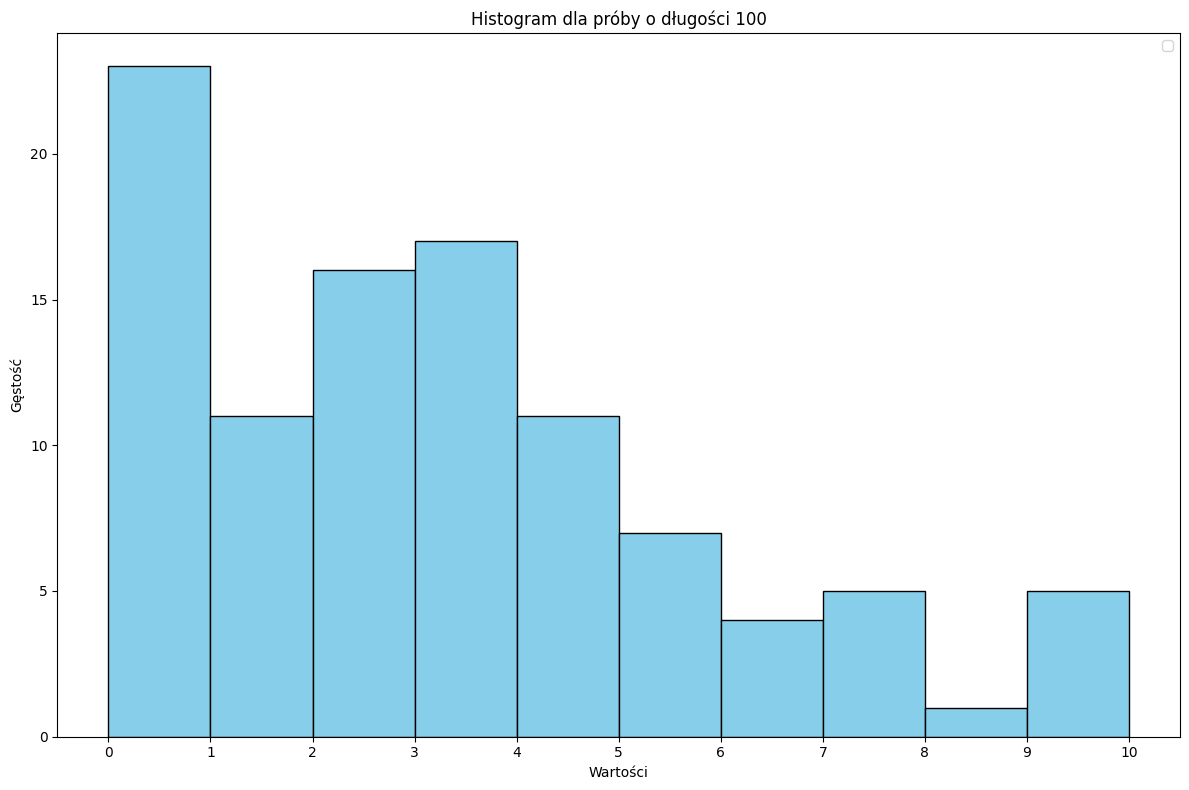

In [69]:
histogram(points_100)


Wynik testu t - studenta


In [ ]:
if abs(t_value(100,std_100,mean_100,5)) > critical_value_100:
    print("Odrzucamy hipotezę zerową i przyjmujemy alternathywną")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej")

Odrzucamy hipotezę zerową i przyjmujemy alternathywną


Statystyka testowa po lewej i wartośc p po prawej: 

In [82]:
t_value(100,std_100,mean_100,5)

(np.float64(-11.202240672224077), np.float64(2.664781489351964e-19))

### Dla symulacji n = 1000

Histogram

C:\Users\nukle\AppData\Local\Temp\ipykernel_10312\1487444111.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


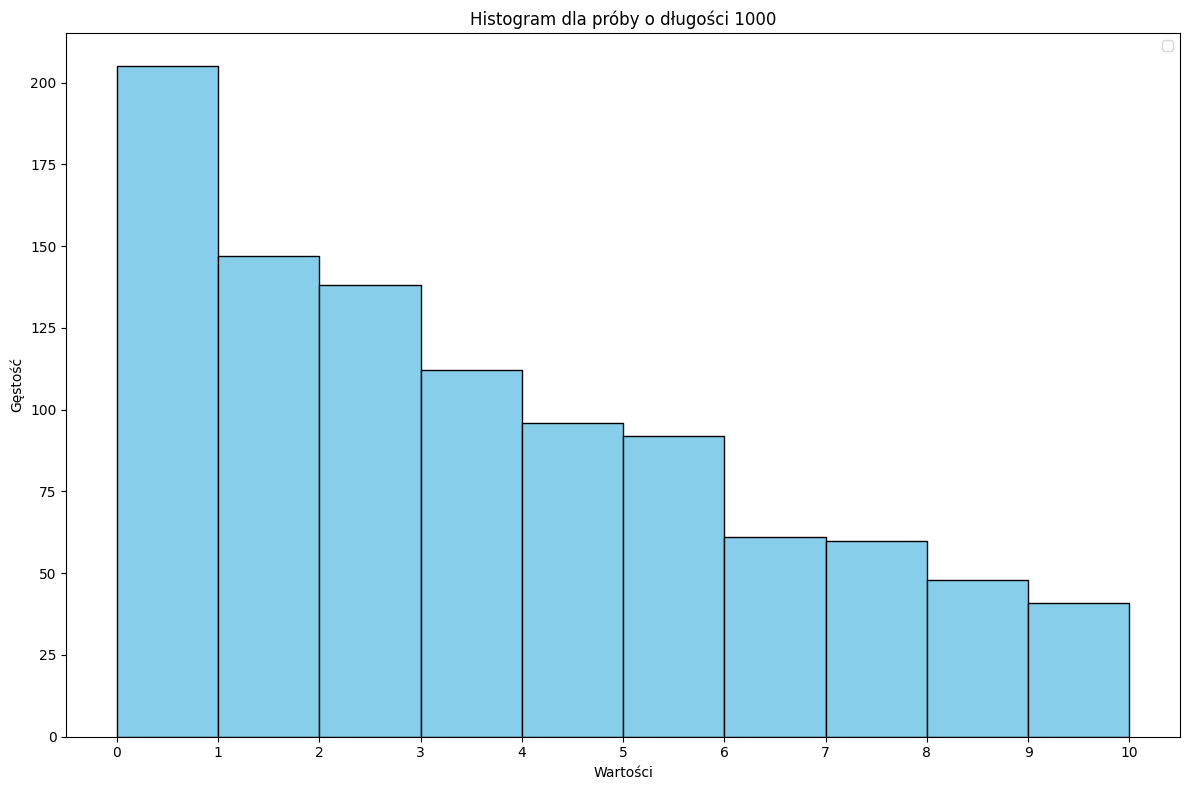

In [68]:
histogram(points_1000)

Wynik testu t - studenta

In [ ]:
if abs(t_value(1000,std_1000,mean_1000,5)) > critical_value_1000:
    print("Odrzucamy hipotezę zerową i przyjmujemy alternathywną")
else:
    print("Nie ma podstaw do odrzucenia hipotezy zerowej")

Odrzucamy hipotezę zerową i przyjmujemy alternathywną


Statystyka testowa po lewej i wartośc p po prawej: 

In [83]:
t_value(1000,std_1000,mean_1000,5)

(np.float64(-32.59857344312911), np.float64(2.378834763766594e-159))

## Sprawdzanie, czy rozkład wyników jest równomierny

### Wartość krytyczna testu chi-kwadrat

In [ ]:
critical_value_chisquare = 16.919

Poziom istotności testu chi-kwadrat : 0.05

H0 : rozkład ciągu jest równomierny  
HA : rozkład ciągu nie jest równomierny

### Dla n = 10

Statystyka testowa dla n = 10 : po lewej statystyka testowa, po prawej wartość p

In [72]:
chisquare(points_10)

(np.float64(17.0), np.float64(0.048715976147641296))

In [74]:
if chisquare(points_10)[1] > 0.05:
    print("Odrzucamy hipotezę zerową - rozkład nie jest równomierny.")
else:
    print("Nie możemy odrzucić hipotezy zerowej - rozkład jest równomierny.")


Nie możemy odrzucić hipotezy zerowej - rozkład jest równomierny.


### Dla n = 100

Statystyka testowa dla n = 10 : po lewej statystyka testowa, po prawej wartość p

In [79]:
chisquare(points_100)

(np.float64(36.3), np.float64(0.9999999990219828))

Wynik :

In [76]:
if chisquare(points_100)[1] > 0.05:
    print("Odrzucamy hipotezę zerową - rozkład nie jest równomierny.")
else:
    print("Nie możemy odrzucić hipotezy zerowej - rozkład jest równomierny.")


Odrzucamy hipotezę zerową - rozkład nie jest równomierny.


### Dla n = 1000

Statystyka testowa dla n = 10 : po lewej statystyka testowa, po prawej wartość p

In [81]:
chisquare(points_1000)

(np.float64(224.26999999999998), np.float64(1.0))

Wynik :

In [77]:
if chisquare(points_1000)[1] > 0.05:
    print("Odrzucamy hipotezę zerową - rozkład nie jest równomierny.")
else:
    print("Nie możemy odrzucić hipotezy zerowej - rozkład jest równomierny.")


Odrzucamy hipotezę zerową - rozkład nie jest równomierny.


## Wnioski

Dla wszystkich trzech symulacji wynikiem testu t - Studenta jest odrzucenie hipotezy zerowej i przyjęcie alternatywnej.  
Oznacza to, że średnia wyników symulacji nie jest większa od 5.   
Wynik ten pokrywa się z tym co można zauważyć na histogramach dla każdej symulacji.  
Widoczne jest tutaj znaczącą róznicę szczególnie pomiędzy występowaniem strzałów z punktacją 0, a innymi strzałami.  
Nie jest to nic dziwnego, gdyż obszarów za które można zdobyć 0 pkt jest więcej niż innych.  

Z Histogramów dla symulacji n = 1000 oraz n = 100 można z całą pewnością wywnioskować, że rozkłady punktacji strzałów nie są równomierne,  
jednak aby się upewnić, został również przeprowadzony test Chi-Kwadrat, który również wykazał, że rozkłady dla tych dwóch symulacji nie są równomierne.  
Sytuacja jest inna jeśli chodzi o symulacje n = 10. Prawdopodobnie z powodu małej ilości prób rozkład przypomina równomierny,  
co wynik testu Chi-Kwadrat również potwierdza. 

Ostatecznie właśnie na podstawie wyników z symulacji n = 1000 oraz n = 100, które są bardziej wiarygodne z uwagi na większą ilość prób,  
można stwierdzić, że rozkład wyników dyskobola nie jest rozkładem równomiernym. 

